In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [121]:
df = pd.read_csv("/content/sample_data/clean_data.csv")
df.head()

,id_visitor,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request,...,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request,year,month,day,hour
0,ed1329a6-064d-47e9-93bc-93f5a50822df,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,0,...,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0.0,0.0,0.0,2015,2,16,21
1,ed1329a6-064d-47e9-93bc-93f5a50822df,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,0,...,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0.0,0.0,0.0,2015,2,18,11
2,ed1329a6-064d-47e9-93bc-93f5a50822df,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,0,...,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0.0,0.0,0.0,2015,2,18,13
3,ed1329a6-064d-47e9-93bc-93f5a50822df,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,0,...,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0.0,0.0,0.0,2015,2,18,14
4,ed1329a6-064d-47e9-93bc-93f5a50822df,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,0,...,2015-02-19,2015-02-19 22:21:58,2015-02-19 22:22:02,0.0,0.0,0.0,2015,2,19,12


In [122]:
df_pengunjung = df.iloc[:,0:10]
df_pengunjung.head(2)

,id_visitor,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,0


In [123]:
df_pengunjung['ts_min'] = pd.to_datetime(df_pengunjung['ts_min'])
df_pengunjung['hour'] = df_pengunjung['ts_min'].dt.hour
df_pengunjung.head(2)

,id_visitor,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request,hour
0,ed1329a6-064d-47e9-93bc-93f5a50822df,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,0,21
1,ed1329a6-064d-47e9-93bc-93f5a50822df,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,0,11


In [124]:
df_pengunjung.drop(['ds'	,'ts_min',	'ts_max'], inplace=True, axis=1)

In [125]:
df_pengunjung.drop(['id_visitor','dim_user_agent'], inplace=True, axis=1)

In [126]:
X = df_pengunjung.drop(['sent_booking_request'], axis=1)
X

,dim_session_number,dim_device_app_combo,did_search,sent_message,hour
0,83,iPhone - iOS,0,0,21
1,84,Desktop - Chrome,0,0,11
2,85,Desktop - Chrome,0,0,13
3,86,Desktop - Chrome,0,0,14
4,87,Desktop - Chrome,0,0,12
...,...,...,...,...,...
6776,1,iPad - Web,0,0,21
6777,2,iPad - Web,1,0,20
6778,3,iPad - Web,1,0,6
6779,4,iPad - Web,1,0,3


In [127]:
y = df_pengunjung.loc[:,['sent_booking_request']]
y.value_counts() # imbalance data

sent_booking_request
0                       6645
1                        136
dtype: int64

In [128]:
encoderLE = LabelEncoder()
X['dim_device_app_combo'] = encoderLE.fit_transform(X['dim_device_app_combo'])

In [129]:
smote = SMOTE(random_state=42)
X_new , y_new = smote.fit_resample(np.array(X), np.array(y))

In [130]:
type(X_new)

numpy.ndarray

In [131]:
y_new = y_new.reshape(-1,1)
y_new.shape

(13290, 1)

In [132]:
df_pengunjung = pd.concat([pd.DataFrame(X_new,columns=['session','device_app_combo','did_search','sent_message','hour' ]), pd.DataFrame(y_new,columns=["sent_booking_request"])], axis=1)

In [133]:
df_pengunjung

,session,device_app_combo,did_search,sent_message,hour,sent_booking_request
0,83,16,0,0,21,0
1,84,6,0,0,11,0
2,85,6,0,0,13,0
3,86,6,0,0,14,0
4,87,6,0,0,12,0
...,...,...,...,...,...,...
13285,28,7,0,0,6,1
13286,2,6,0,1,7,1
13287,24,6,0,0,10,1
13288,24,6,0,0,12,1


<Axes: >

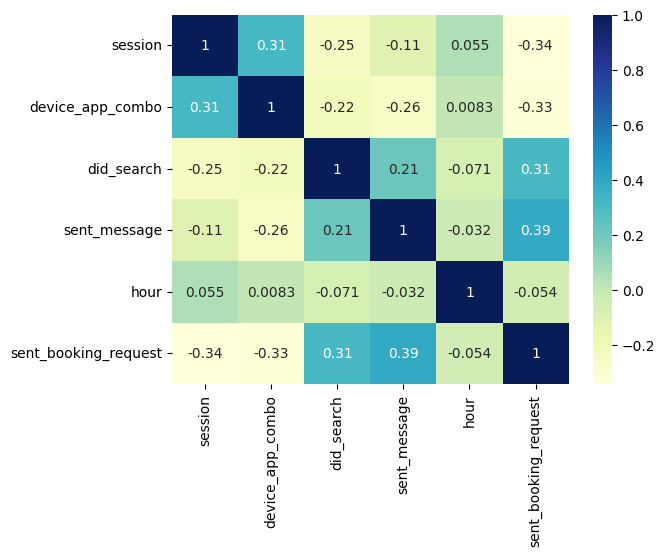

In [134]:
sns.heatmap(df_pengunjung.corr(), annot=True, cmap="YlGnBu")

In [135]:
for code, category in enumerate(encoderLE.classes_):
    print(f"Kode {code}: {category}")

Kode 0: Android Phone - Android
Kode 1: Android Phone - Moweb
Kode 2: Android Phone - Web
Kode 3: Android Tablet - Android
Kode 4: Android Tablet - Moweb
Kode 5: Android Tablet - Web
Kode 6: Desktop - Chrome
Kode 7: Desktop - Firefox
Kode 8: Desktop - IE
Kode 9: Desktop - Safari
Kode 10: Other - Other
Kode 11: Unknown - Moweb
Kode 12: iPad - Web
Kode 13: iPad - iOS
Kode 14: iPhone - Moweb
Kode 15: iPhone - Web
Kode 16: iPhone - iOS


In [136]:
def convert_data(data):
  for code, category in enumerate(encoderLE.classes_):
      if code ==  data:
        return category

In [137]:
df_pengunjung['device_app_combo'] = [convert_data(i) for i in df_pengunjung.device_app_combo]
df = pd.get_dummies(df_pengunjung['device_app_combo'])

In [138]:
df_pengunjung = pd.concat([df_pengunjung, df],axis=1)

In [140]:
df_pengunjung = df_pengunjung.drop(['device_app_combo'], axis=1)

In [142]:
df_pengunjung

,session,did_search,sent_message,hour,sent_booking_request,Android Phone - Android,Android Phone - Moweb,Android Phone - Web,Android Tablet - Android,Android Tablet - Moweb,...,Desktop - Firefox,Desktop - IE,Desktop - Safari,Other - Other,Unknown - Moweb,iPad - Web,iPad - iOS,iPhone - Moweb,iPhone - Web,iPhone - iOS
0,83,0,0,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,84,0,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,85,0,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,86,0,0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,87,0,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13285,28,0,0,6,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13286,2,0,1,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13287,24,0,0,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13288,24,0,0,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
attributes = df_pengunjung.drop(['sent_booking_request'], axis=1)
label = df_pengunjung['sent_booking_request']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(attributes,label, test_size=0.2)

In [145]:
X_train

,session,did_search,sent_message,hour,Android Phone - Android,Android Phone - Moweb,Android Phone - Web,Android Tablet - Android,Android Tablet - Moweb,Android Tablet - Web,...,Desktop - Firefox,Desktop - IE,Desktop - Safari,Other - Other,Unknown - Moweb,iPad - Web,iPad - iOS,iPhone - Moweb,iPhone - Web,iPhone - iOS
9903,77,0,1,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13125,12,1,0,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7856,22,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3366,76,0,1,8,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9281,25,1,1,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11171,28,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7973,40,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7038,3,1,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4186,213,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [146]:
model = RandomForestRegressor()
param_grid = {
    "n_estimators": [150,200,250,300],
    "max_features":[8,10,12,14],
    "max_depth":[10,15,20],
    "min_samples_split":[2,4,6,8]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': [8, 10, 12, 14],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [150, 200, 250, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [149]:
best = grid_search.best_estimator_

In [150]:
best.score(X_test, y_test)

0.8472443735415209